# Decision Tree

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report

# 데이터 셋

wine 데이터셋

In [ ]:
wine_csv = 'https://bit.ly/wine_csv_data'

In [ ]:
wine_df = pd.read_csv(wine_csv)

In [ ]:
wine_df.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [ ]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
wine_df.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [ ]:
class_counts = wine_df['class'].value_counts()
class_counts

,count
class,
1.0,4898
0.0,1599


## alchol, sugar, pH 변수들의 히스토그램

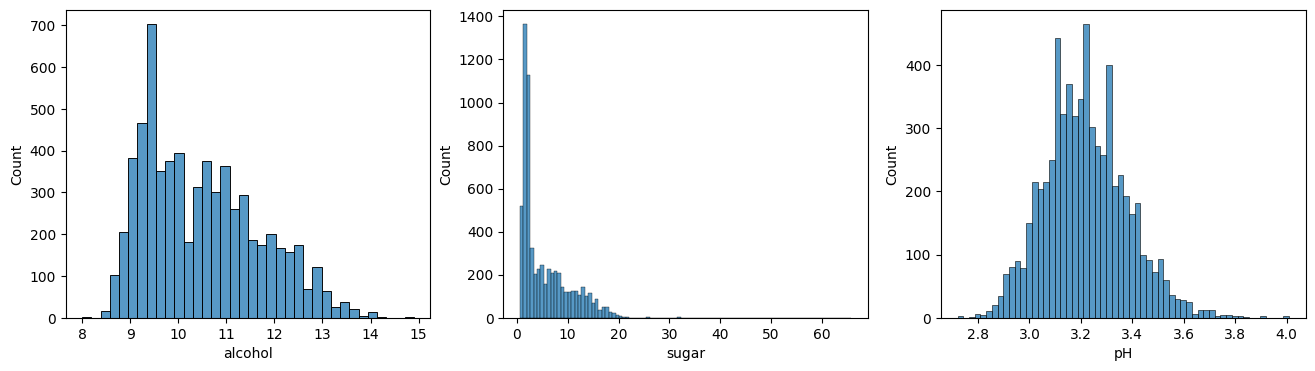

In [ ]:
fig, axes = plt.subplots(ncols = 3, figsize =(16,4))

for i, c in enumerate(wine_df.columns[:3]):
    sns.histplot(data = wine_df, x = c, ax = axes[i])

plt.show()

## class 별로 색깔을 다르게 시각화한 pairplot

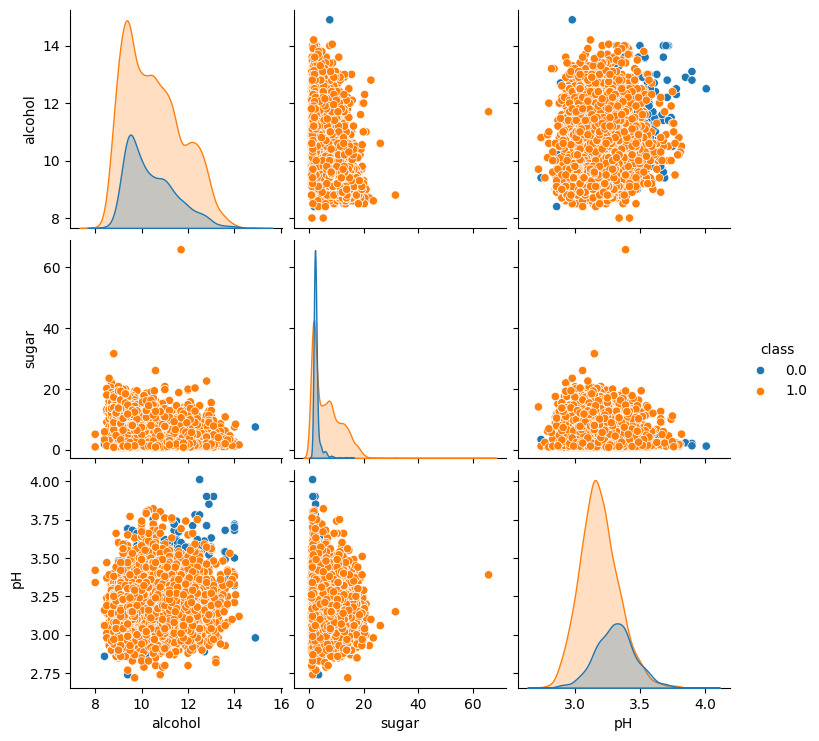

In [ ]:
sns.pairplot(data = wine_df, hue = 'class')
plt.show()     plt

# 훈련/테스트 나누기

In [ ]:
X = wine_df[wine_df.columns[:3]].values         # 특성 배열(alchol, sugar, pH)
y = wine_df['class'].values         # 타겟 배열(class)

In [ ]:
X[:5,:]

array([[9.4 , 1.9 , 3.51],
       [9.8 , 2.6 , 3.2 ],
       [9.8 , 2.3 , 3.26],
       [9.8 , 1.9 , 3.16],
       [9.4 , 1.9 , 3.51]])

In [ ]:
y[:5]

array([0., 0., 0., 0., 0.])

In [ ]:
y[-5:]

array([1., 1., 1., 1., 1.])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42, stratify= y)

In [ ]:
X_train.shape

(5197, 3)

In [ ]:
X_test.shape

(1300, 3)

In [ ]:
feature_names = wine_df.columns[:3]         # 특성이름
target_names = ['red','white']          # 클래스 이름(레이블)
print(target_names)
print(feature_names)

['red', 'white']
Index(['alcohol', 'sugar', 'pH'], dtype='object')


# Decision Tree Classifier

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=42)          # 모델 생성

In [ ]:
tree_clf.fit(X_train, y_train)          # 모델 훈련

DecisionTreeClassifier(random_state=42)

In [ ]:
tree_clf.score(X_train,y_train)

0.9978833942659227

In [ ]:
train_pred = tree_clf.predict(X_train)          # 훈련셋 예측값

In [ ]:
train_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
cm_train = confusion_matrix(y_train, train_pred)
cm_train

array([[1276,    3],
       [   8, 3910]])

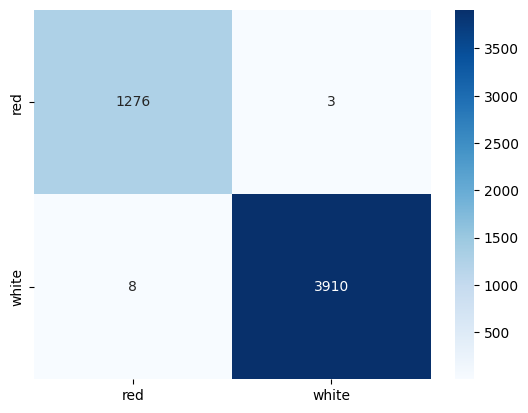

In [ ]:
sns.heatmap(data = cm_train, cmap= 'Blues', annot= True, fmt= 'd',
            xticklabels= target_names, yticklabels = target_names)
plt.show()

In [ ]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1279
         1.0       1.00      1.00      1.00      3918

    accuracy                           1.00      5197
   macro avg       1.00      1.00      1.00      5197
weighted avg       1.00      1.00      1.00      5197



In [ ]:
test_pred = tree_clf.predict(X_test)

In [ ]:
cm_test = confusion_matrix(y_test, test_pred)
cm_test

array([[226,  94],
       [ 81, 899]])

<Axes: >

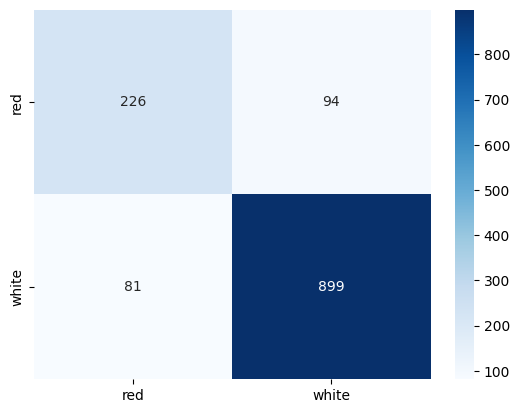

In [ ]:
sns.heatmap(data = cm_test, cmap = 'Blues', annot= True, fmt= 'd', xticklabels= target_names, yticklabels= target_names)

In [ ]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.71      0.72       320
         1.0       0.91      0.92      0.91       980

    accuracy                           0.87      1300
   macro avg       0.82      0.81      0.82      1300
weighted avg       0.86      0.87      0.86      1300



Decision Tree는 과대적합이 매우 크다.

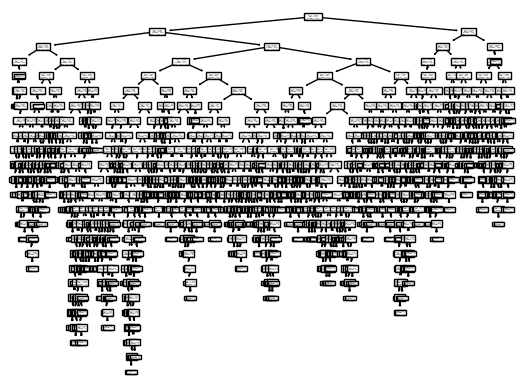

In [ ]:
plot_tree(tree_clf)
plt.show()

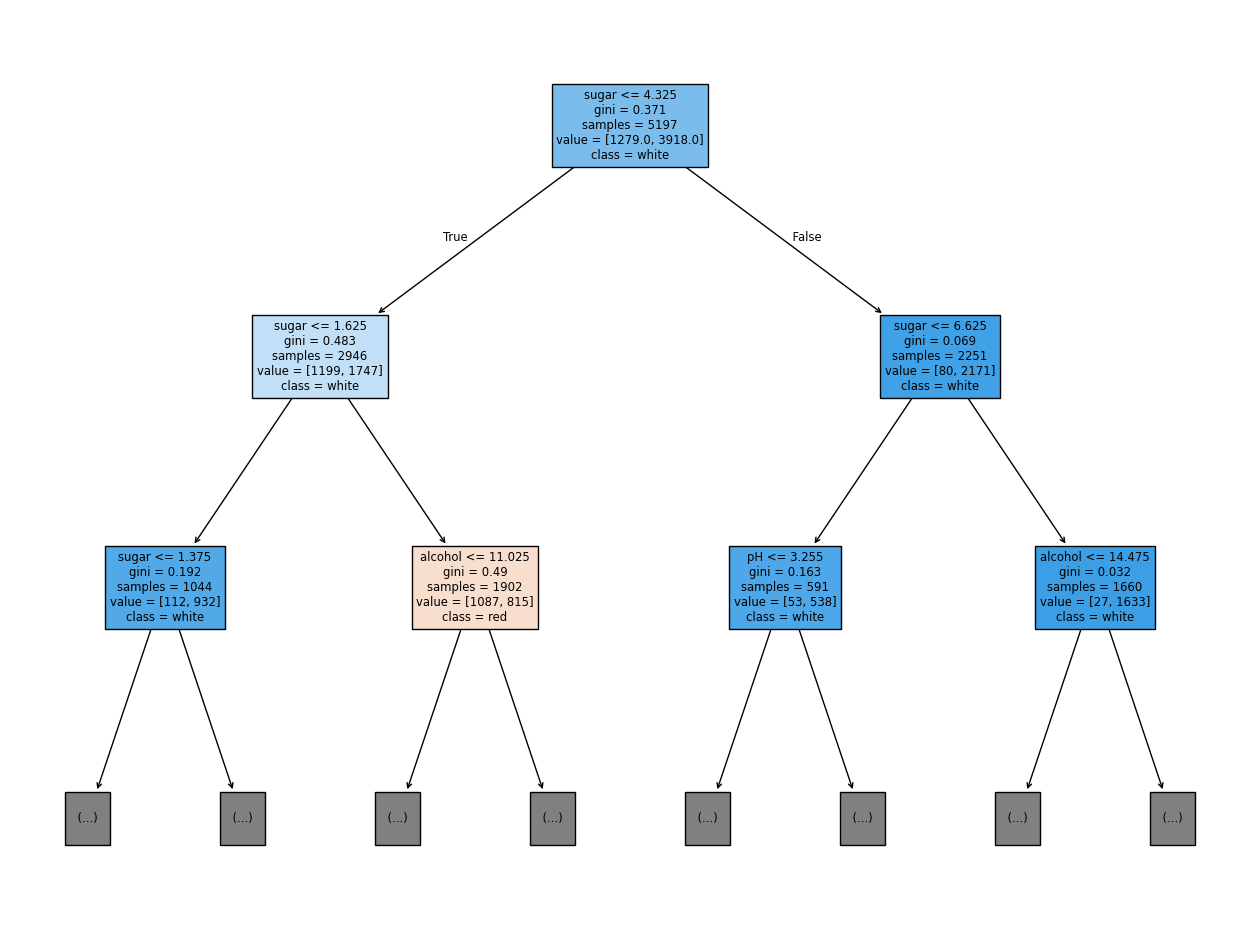

In [ ]:
plt.figure(figsize= (16,12))
plot_tree(tree_clf, max_depth= 2, feature_names = feature_names, class_names= target_names, filled = True)

plt.show()

## Decision Tree를 나누는 기준

---

__Gini impurity(불순도)__

$$
Gini = 1 - \sum_i p_i^2
$$

*   $p_i$: $i$번째 클래스가 될 확률
*   이진(binary class) 분류
    *   gini = 1 - ((양성 클래스 확률)^2 + (음성 클래스 확률)^2)
    *   양성과 음성의 비율이 1:1인 경우, gini = 1 - (0.5^2 + 0.5^2) = 0.5. 불순도 최대.
    *   양성 또는 음성으로 완벽하게 분류된 경우, gini = 1 - 1 = 0. 불순도 최소.
*   Decision tree는 부모 노드와 자식 노드의 gini 불순도 차이가 가능한 커지도록 가지를 성장시킴.

---

__Entropy(엔트로피)__

$$
Entropy = -\sum_i p_i \log_k (p_i)
$$

*   $k$: 클래스의 개수(이진 분류인 경우, k=2).
*   $p_i$: $i$번째 클래스가 될 확률.
*   이진 분류
    *   양성과 음성의 비율이 1:1인 경우, Entropy = 1. 엔트로피 최대.
    *   양성 또는 음성으로 완벽히 분류된 경우, Entropy = 0. 엔트로피 최소.
*   Decision tree 객체를 생성할 때 criterion='entropy'라고 설정하면, 부모 노드와 자식 노드에서의 엔트로피 차이가 가능하면 커지도록 가지를 생성함.


## Decision Tree 특징

*   장점:
    *   특성들을 스케일링할 필요가 없다.
    *   결과를 이해하기 쉽다.
*   단점:
    *   과적합(overfitting)되기가 쉽다.
    *   여러가지 규제들을 적용해서 과적합 문제를 해결해야 함.
*   규제 하이퍼 파라미터(hyperparameter) - 생성자의 파라미터들
    *   `max_depth`: decision tree의 최대 깊이.
    *   `max_leaf_node`: leaf node의 최댓값.
    *   `max_features`: 각 노드에서 분할에 사용할 특성의 최대 개수.
    *   `min_samples_split`: 노드가 분할되기 위해서 가져야 할 최소 샘플 개수.
    *   `min_samples_leaf`: leaf 노드가 가져야 할 최소 샘플 개수.
    *   `max_`로 시작하는 파라미터의 값을 증가시키면, 트리의 크기가 커짐.
        *   규제가 작아짐.
        *   overfitting이 커짐.
    *   `max_`로 시작하는 파라미터 값을 감소시키면, 트리의 크기가 작아지기 때문에 overfitting이 작아짐.
    *   `min_`으로 시작하는 파라미터 값을 증가시키면, 트리의 크기가 작아짐.
    

## max_depth 파라미터 변화에 따른 정확도

In [ ]:
# 최대 깊이가 2인 decision tree
tree_clf = DecisionTreeClassifier(max_depth = 2, random_state= 42)


In [ ]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
plt.figure(figsize=(12,12))
plot_tree(tree_clf, feature_names= feature_names, target_names = )

In [ ]:
# 최대 깊이가 5인 decision tree
tree_clf = DecisionTreeClassifier(max_depth=5, random_state= 42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

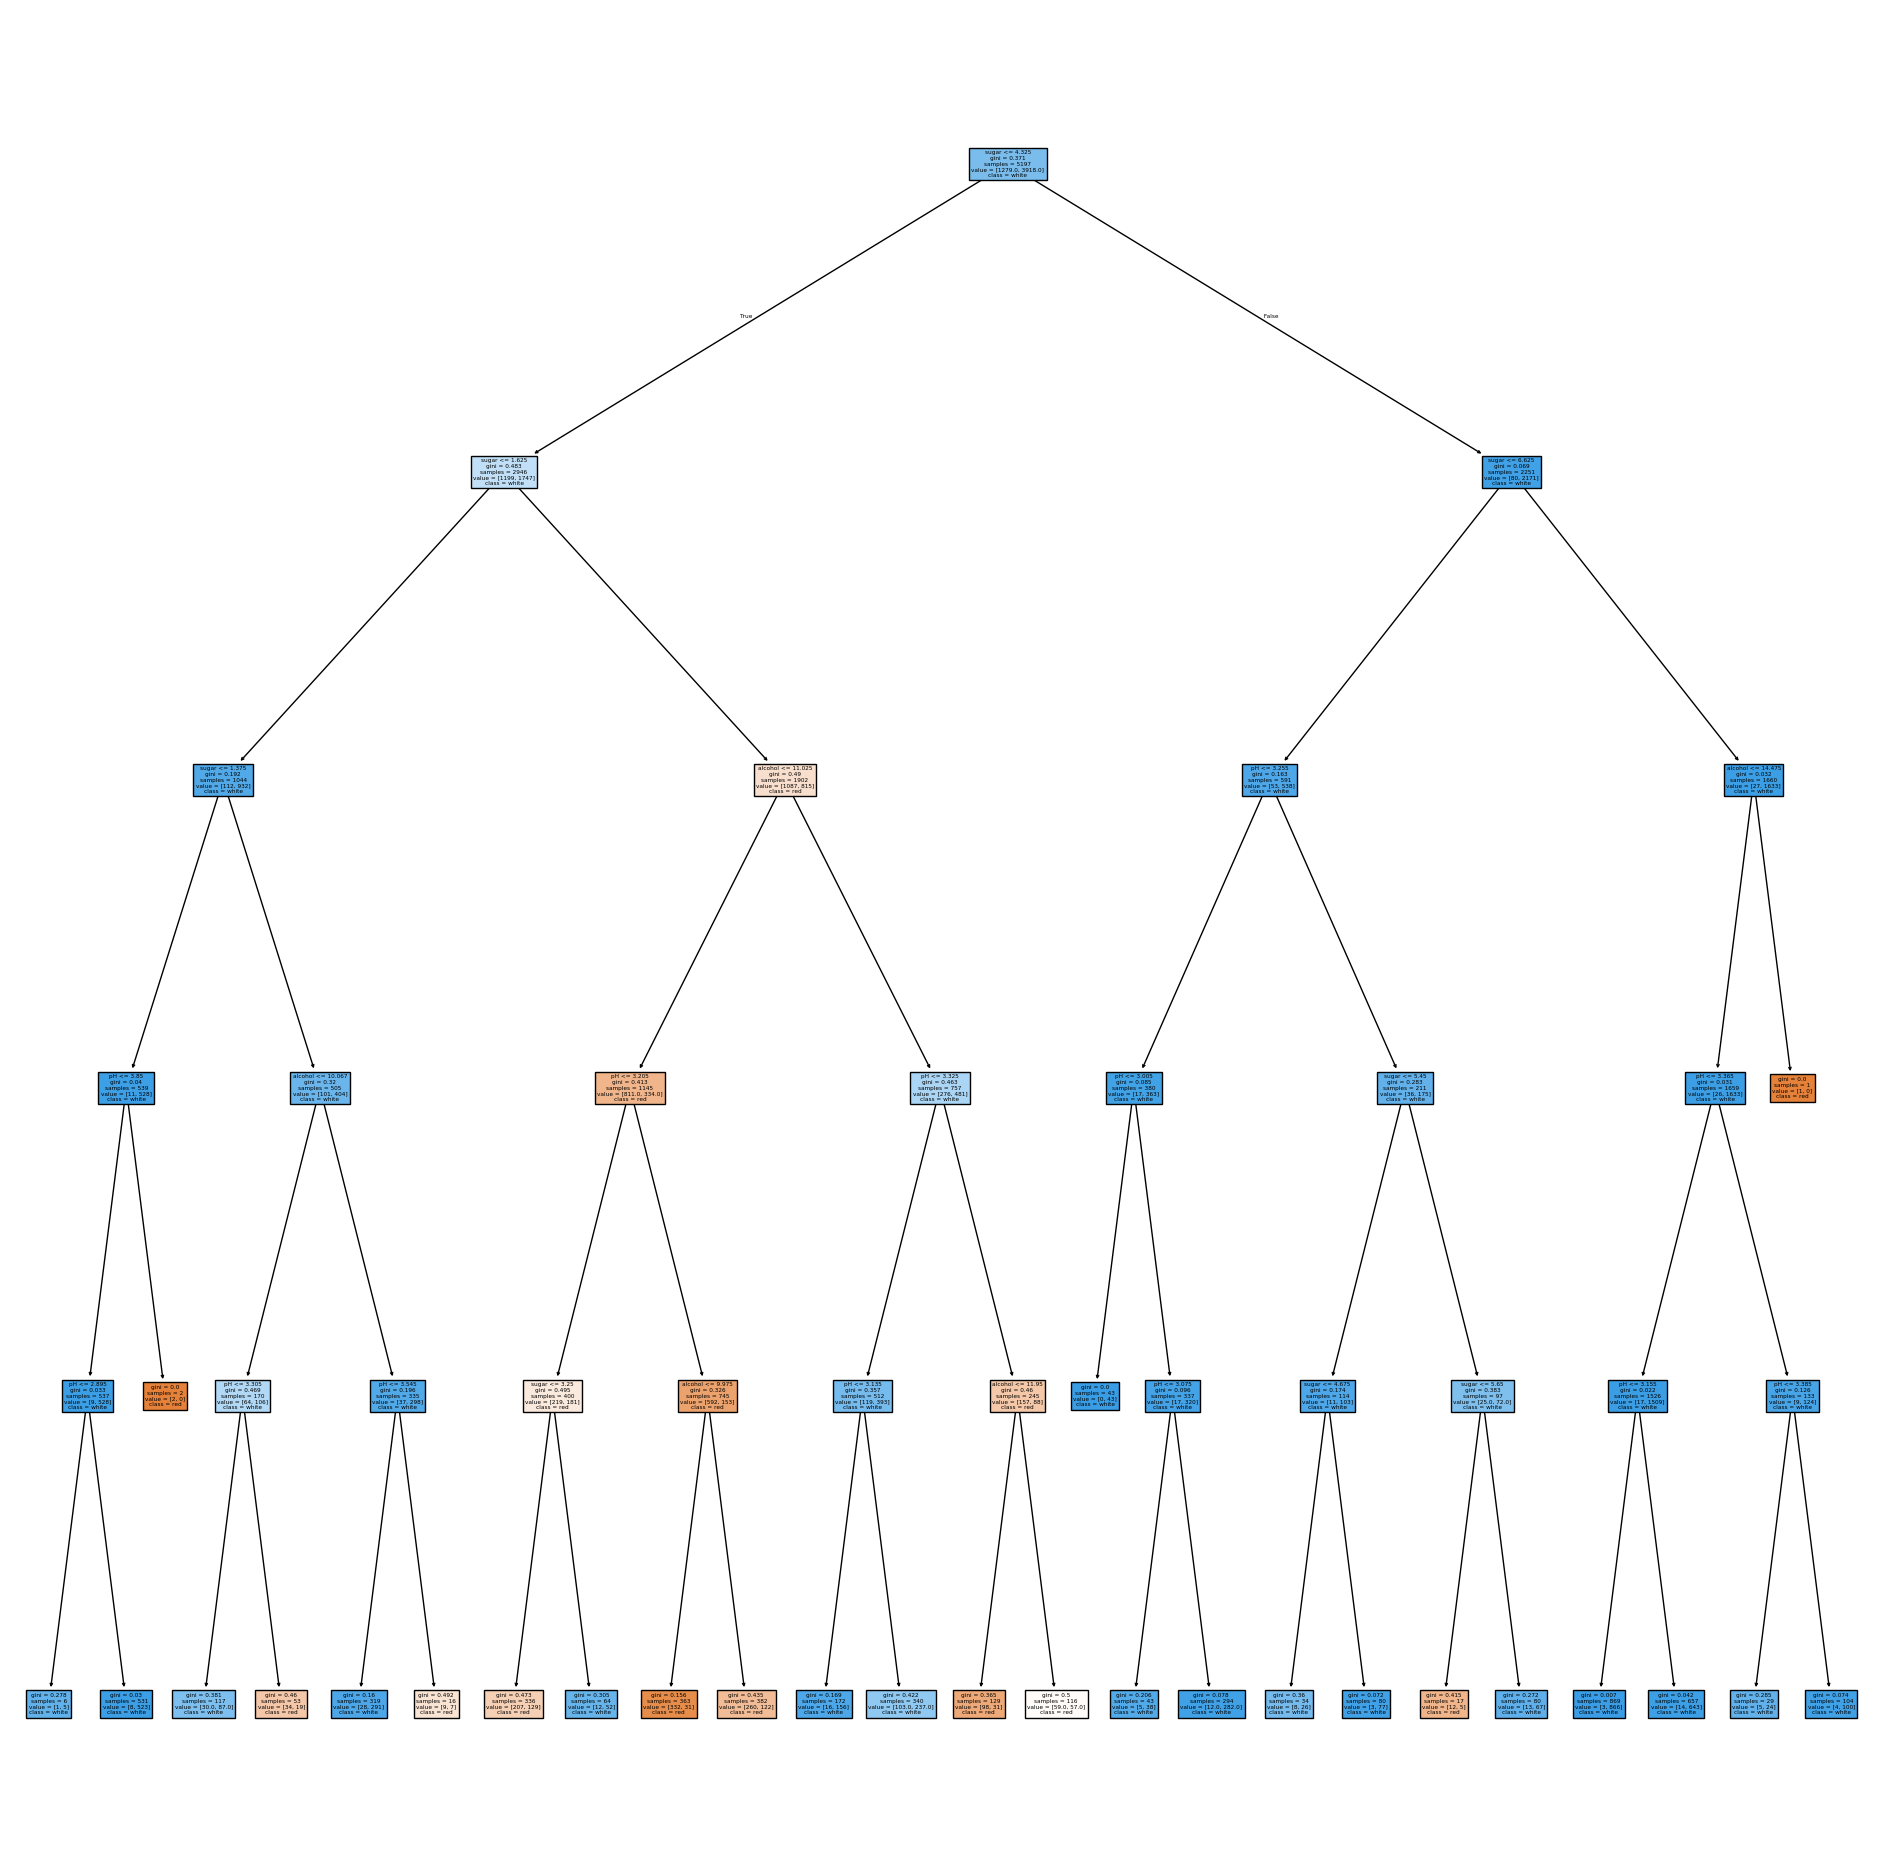

In [ ]:
plt.figure(figsize = (24,24))
plot_tree(tree_clf, feature_names= feature_names, class_names = target_names, filled = True)
plt.show()

In [ ]:
print('train acc.:', tree_clf.score(X_train, y_train))
print('test acc.:', tree_clf.score(X_test, y_test))


train acc.: 0.8718491437367712
test acc.: 0.8576923076923076


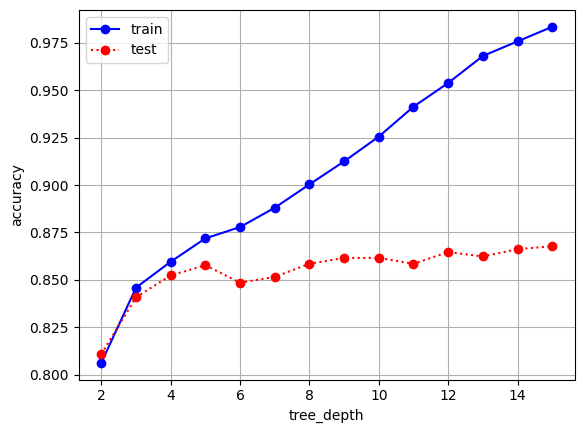

In [ ]:
# max_depth: 2 ~ 10

depths = np.arange(2, 16)
train_scores = []
test_scores = []

for d in depths:
    tree_clf = DecisionTreeClassifier(max_depth = d, random_state= 42)
    tree_clf.fit(X_train, y_train)
    train_scores.append(tree_clf.score(X_train, y_train))
    test_scores.append(tree_clf.score(X_test, y_test))

plt.plot(depths, train_scores, 'bo-', label= 'train')
plt.plot(depths, test_scores, 'ro:' , label = 'test')


plt.legend()
plt.xlabel('tree_depth')
plt.ylabel('accuracy')
plt.grid()
plt.show()


# 하이퍼 파라미터 튜닝

*   전체 데이터를 훈련(train)-검증(validation)-테스트(test) 셋으로 나눔.
*   하이퍼 파라미터를 변경하면서 훈련 셋으로 ML 모델을 훈련시킴.
*   하이퍼 파라미터 설정에 따른 성능 테스트는 검증 셋으로 수행.
    *   검증 셋에서 점수가 좋은 (그리고 과대적합이 적은) 하이퍼 파라미터를 선택.
*   튜닝이 끝난 모델의 일반화 성능을 예측하기 위해서 테스트 셋을 사용.

In [ ]:
# 전체 데이처 셋을 훈련/ 테스트로 나누기
X_tr_full, X_test, y_tr_full, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42, stratify= y)

In [ ]:
# X_tr_full을 훈련/ 검증 셋으로 나누기
X_tr, X_val, y_tr, y_val = train_test_split(X_tr_full, y_tr_full, test_size= 0.2, random_state= 42, stratify= y_tr_full)

In [ ]:
depths  = np.arange(2, 16)
train_scores = []
val_scores = []

for i in depths:
    tree_clf = DecisionTreeClassifier(max_depth = i, random_state=42)
    tree_clf.fit(X_tr, y_tr)
    train_scores.append(tree_clf.score(X_tr, y_tr))
    val_scores.append(tree_clf.score(X_val, y_val))

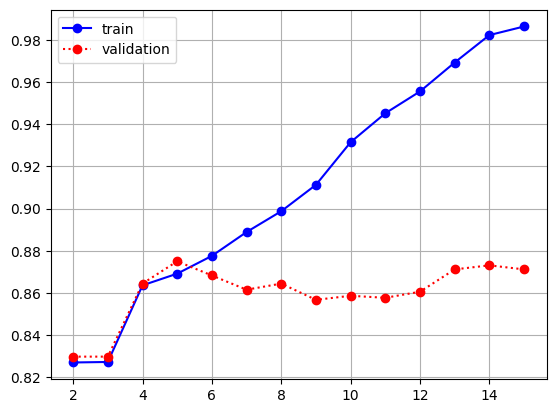

In [ ]:
plt.plot(depths, train_scores, 'bo-', label = 'train')
plt.plot(depths, val_scores, 'ro:', label ='validation')
plt.grid()
plt.legend()
plt.show()

In [ ]:
train_scores[4], val_scores[4]          # max_depth= 6일 때 훈련 셋 정확도, 검증 셋 정확도

(0.8775559297570363, 0.8682692307692308)

## min_samples_split 하이퍼 파라미터 튜닝

In [ ]:
min_samples = [0.01, 0.05, 0.1, 0.15, 0.2]
train_scores = []
val_scores = []
for s in min_samples:
    # min_samples_split=0.01: node를 나누기 위한 기준 - 훈련 셋의 1%
    tree_clf = DecisionTreeClassifier(min_samples_split=s, random_state=42)
    tree_clf.fit(X_tr, y_tr)
    train_scores.append(tree_clf.score(X_tr, y_tr))
    val_scores.append(tree_clf.score(X_val, y_val))

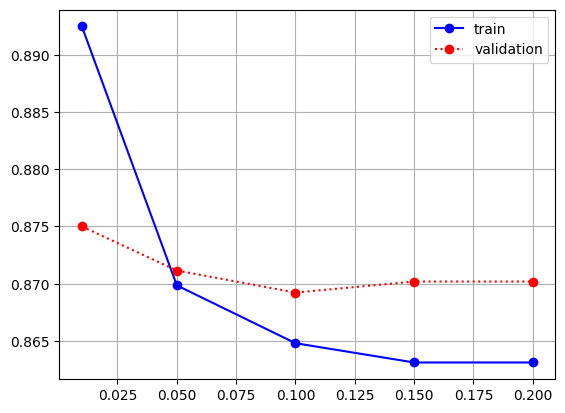

In [ ]:
plt.plot(min_samples, train_scores, 'bo-', label='train')
plt.plot(min_samples, val_scores, 'ro:', label='validation')
plt.legend()
plt.grid()
plt.show()

# 교차 검증(Cross Validation)

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score

In [ ]:
X_tr_full.shape

(5197, 3)

In [ ]:
y_tr_full.shape

(5197,)

In [ ]:
# 교차 검증에서 사용할 예측기
clf = DecisionTreeClassifier(max_depth= 6, random_state= 42)

# 5-fold 교차 검증(cross validation): 정체 훈련 셋을 5개로 나눠서 그 중 한 개를 검증으로 사용.
# 파라미터 cv: n-fold 교차 검증
# 파라미터 n-jobs: 동시에(병렬로) 수행할 작업 개수. -1이면 CPU의 모든 코어를 사용.
# 파라미터 return_train_score: 훈련 점수를 리턴할 것인 지.
cv = cross_validate(estimator= clf, X= X_tr_full, y = y_tr_full,
                    cv=5, n_jobs=-1, return_train_score= True)

In [ ]:
cv      #> cross_validate() 함수의 리턴 값은 dict 객체

{'fit_time': array([0.00944853, 0.00945663, 0.00994611, 0.00716543, 0.00824428]),
 'score_time': array([0.00207996, 0.00224638, 0.00167561, 0.0015521 , 0.00143838]),
 'test_score': array([0.87019231, 0.86634615, 0.84889317, 0.86429259, 0.86044273]),
 'train_score': array([0.87466923, 0.8811643 , 0.88455988, 0.88095238, 0.88648389])}

In [ ]:
np.mean(cv['train_score'])          # 각 교차 검증에서 훈련 셋 정확도들의 평균
#> 교차검증 훈련 셋 점수 평균은 일반적인 훈련 셋 점수와 비슷하거나 약간 좋음

np.float64(0.8815659371589127)

In [ ]:
np.mean(cv['test_score'])           # 각 교차 검증에서 검증 셋 정확도들의 평균

np.float64(0.8620333900940252)

In [ ]:
# n-fold 교차 검증에서 각각의 검증 셋에서의 점수(정확도)들을 리턴
cross_val_score(estimator = clf, X= X_tr_full, y= y_tr_full, cv = 5, n_jobs = -1)

array([0.87019231, 0.86634615, 0.84889317, 0.86429259, 0.86044273])

## 교차 검증을 사용한 max_depth 하이퍼 파라미터 튜닝

In [ ]:
train_scores = []
val_scores = []
max_depths = np.arange(2,16)
for d in max_depths:
    tree = DecisionTreeClassifier(max_depth = d, random_state=42)
    cv = cross_validate(estimator= tree, X= X_tr_full, y = y_tr_full,
                        cv = 5, n_jobs = -1, return_train_score= True)
    train_acc = np.mean(cv['train_score'])
    train_scores.append(train_acc)
    test_acc = np.mean(cv['test_score'])
    val_scores.append(test_acc)

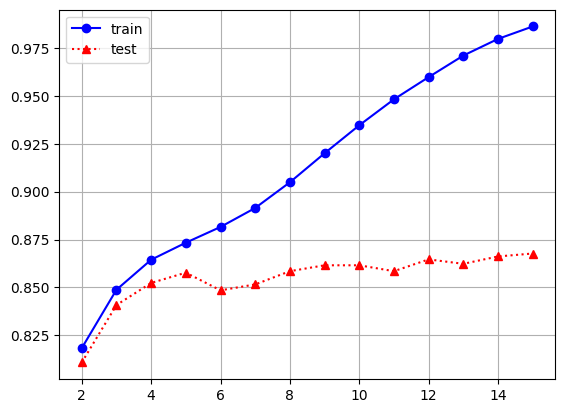

In [ ]:
plt.plot(max_depths, train_scores, 'bo-', label= 'train')
plt.plot(max_depths, test_scores, 'r^:', label= 'test')
plt.grid()
plt.legend()
plt.show()

In [ ]:
np.max(val_scores)

np.float64(0.8631863108018065)

In [ ]:
np.argmax(val_scores)

np.int64(3)

In [ ]:
max_depths[np.argmax(val_scores)]

np.int64(5)

# Grid Search Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# 파라미터 튜닝을 하려는 ML 모델(예측기) 생성
tree = DecisionTreeClassifier(random_state= 42)

In [ ]:
# 튜닝할 하이퍼 파라미터들의 조합을 dict로 만듦. 키는 ML 클래스 생성자의 파라미터 이름을 사용.
params = {'max_depth': np.arange(2,21),
          'min_samples_split': np.arange(2,100,2)}

In [ ]:
# GridSearchCV 객체 생성
grid_cv = GridSearchCV(estimator=tree, param_grid= params, n_jobs = -1)

In [ ]:
# 훈련 -> 5-fold 교차 검증 수행하면서 최적의 파라미터 조합을 찾음
grid_cv.fit(X_tr_full, y_tr_full)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68,
       70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])})

In [ ]:
grid_cv.best_params_            # 교차 검증의 test_score를 최대로 만들어 주는 파라미터 조합.

{'max_depth': np.int64(7), 'min_samples_split': np.int64(84)}

In [ ]:
grid_cv.best_score_         # 교차 검증에서 test_score 최댓값.

np.float64(0.867805767379877)

In [ ]:
best_tree = grid_cv.best_estimator_
best_tree

DecisionTreeClassifier(max_depth=np.int64(7), min_samples_split=np.int64(84),
                       random_state=42)

In [ ]:
best_tree.score(X_test, y_test)

0.8476923076923077